[Reference](https://medium.com/@kylejones_47003/pytimetk-for-time-series-analysis-in-python-92f725352d99)

In [2]:
!pip install pytimetk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.7/759.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━

In [2]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import pytimetk as tk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Create a simulated time series dataset
np.random.seed(42)
n = 500
time = pd.date_range(start="2020-01-01", periods=n, freq="D")
values = 100 + np.cumsum(np.random.normal(0, 1, n))
df = pd.DataFrame({"date": time, "value": values})

# Print the first few rows
print(df.head())

# Plot the time series using pytimetk's plot_timeseries method
fig = (
    tk.plot_timeseries(
        df,
        date_column='date',
        value_column='value',
        facet_ncol=1,
        x_axis_date_labels="%Y",
        engine='plotly',
        title="Simulated Time Series"
    )
)

# fig.write_image("time_series_plot.png")
fig.show()

        date       value
0 2020-01-01  100.496714
1 2020-01-02  100.358450
2 2020-01-03  101.006138
3 2020-01-04  102.529168
4 2020-01-05  102.295015


# Feature Engineering

In [5]:
"""
Feature Engineering
Create lagged features, rolling averages, and Fourier terms for machine learning.
"""


# Feature Engineering
# Add rolling mean and standard deviation for a window of 7 days
rolled_df_7 = tk.augment_rolling_apply(
    df,
    date_column="date",
    window=7,
    window_func=[
        ("rolling_mean_7", lambda x: x["value"].mean()),
        ("rolling_std_7", lambda x: x["value"].std()),
    ],
    center=False,
    threads=1
)

# Add rolling mean and standard deviation for a window of 14 days
rolled_df_14 = tk.augment_rolling_apply(
    rolled_df_7,
    date_column="date",
    window=14,
    window_func=[
        ("rolling_mean_14", lambda x: x["value"].mean()),
        ("rolling_std_14", lambda x: x["value"].std()),
    ],
    center=False,
    threads=1
)

# Add Fourier series for seasonality
rolled_df = tk.augment_fourier(
    rolled_df_14,
    date_column="date",  # Specify the date column
)
rolled_df.tail()

Processing rolling apply...:   0%|          | 0/1 [00:00<?, ?it/s]

Processing rolling apply...:   0%|          | 0/1 [00:00<?, ?it/s]

,date,value,rolling_rolling_mean_7_win_7,rolling_rolling_std_7_win_7,rolling_rolling_mean_14_win_14,rolling_rolling_std_14_win_14,date_sin_1_1,date_cos_1_1
495,2021-05-10,106.904999,105.392433,1.062442,104.579079,1.485415,0.895880,0.444295
496,2021-05-11,105.867752,105.637123,0.917246,104.620392,1.514449,0.249223,-0.968446
497,2021-05-12,105.677414,105.855766,0.644772,104.633575,1.523404,-0.999060,-0.043355
498,2021-05-13,104.801796,105.737900,0.758902,104.638237,1.523844,0.164391,0.986395
499,2021-05-14,103.418999,105.411430,1.160869,104.645721,1.517085,0.931001,-0.365016


# Resample and Aggregate

In [6]:
"""
Time-Based Filtering
Filter data for a specific time period.
"""

# Filter data for the year 2021
df_filtered = tk.filter_by_time(
    df,
    date_column="date",
    start_date="2021-01-01",
    end_date="2021-12-31"
)

# Plot the filtered data using pytimetk's plot_timeseries method
fig = (
    tk.plot_timeseries(
        df_filtered,
        date_column='date',
        value_column='value',
        facet_ncol=1,
        x_axis_date_labels="%b %Y",  # Adjusted for better visualization within a year
        engine='plotly',
        title="Filtered Time Series (2021)"
    )
)

# fig.write_image("filtered_time_series_2021.png")
fig.show()

# Forecast Evaluation

In [7]:
# Feature Engineering
# Add lagged features for 1, 2, and 3 days
df_features = tk.augment_lags(
    df,
    date_column="date",
    value_column="value",
    lags=[1, 2, 3]
)

# Add rolling mean and standard deviation for 7 and 14 days
df_features = tk.augment_rolling_apply(
    df_features,
    date_column="date",
    window=7,
    window_func=[
        ("rolling_mean_7", lambda x: x["value"].mean()),
        ("rolling_std_7", lambda x: x["value"].std())
    ],
    center=False,
    threads=1
)

df_features = tk.augment_rolling_apply(
    df_features,
    date_column="date",
    window=14,
    window_func=[
        ("rolling_mean_14", lambda x: x["value"].mean()),
        ("rolling_std_14", lambda x: x["value"].std())
    ],
    center=False,
    threads=1
)

# Add Fourier series for seasonality
df_features = tk.augment_fourier(
    df_features,
    date_column="date",  # Specify the date column
)

# Drop rows with NaN values (resulting from lagged features or rolling stats)
df_features = df_features.dropna()

# Verify the resulting DataFrame
print(df_features.head())

Processing rolling apply...:   0%|          | 0/1 [00:00<?, ?it/s]

Processing rolling apply...:   0%|          | 0/1 [00:00<?, ?it/s]

         date       value  value_lag_1  value_lag_2  value_lag_3  \
13 2020-01-14  101.880142   103.793427   103.551460   104.017197   
14 2020-01-15  100.155228   101.880142   103.793427   103.551460   
15 2020-01-16   99.592941   100.155228   101.880142   103.793427   
16 2020-01-17   98.580109    99.592941   100.155228   101.880142   
17 2020-01-18   98.894356    98.580109    99.592941   100.155228   

    rolling_rolling_mean_7_win_7  rolling_rolling_std_7_win_7  \
13                    103.724060                     0.876150   
14                    103.116585                     1.543379   
15                    102.495857                     1.972151   
16                    101.652931                     2.226972   
17                    100.921097                     2.161301   

    rolling_rolling_mean_14_win_14  rolling_rolling_std_14_win_14  \
13                      102.746773                       1.430654   
14                      102.722382                       1.474

In [8]:
# Forecast Evaluation
# Split into training and testing sets
train = df_features.iloc[:-100]
test = df_features.iloc[-100:]
# Prepare features and target
X_train = train.drop(columns=["date", "value"])
y_train = train["value"]
X_test = test.drop(columns=["date", "value"])
y_test = test["value"]
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
# Step 4: Combine Actual and Predicted Values for Plotting
test['Predicted'] = y_pred
# Melt data for pytimetk plotting (long format)
plot_df = test.melt(id_vars="date", value_vars=["value", "Predicted"],
                    var_name="Series", value_name="Value")
# Plot using pytimetk
fig = tk.plot_timeseries(
    plot_df,
    date_column="date",
    value_column="Value",
    color_column="Series",
    title="Forecast vs Actual",
    x_axis_date_labels="%b %d, %Y",
    engine="plotly"
)
# fig.write_image("forecast_vs_actual_plot.png")
fig.show()

Mean Squared Error: 1.1140


In [9]:
# Forecast Evaluation
# Split into training and testing sets
train = df_features.iloc[:-100]
test = df_features.iloc[-100:]
# Prepare features and target
X_train = train.drop(columns=["date", "value"])
y_train = train["value"]
X_test = test.drop(columns=["date", "value"])
y_test = test["value"]
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
# Step 4: Combine Actual and Predicted Values for Plotting
test['Predicted'] = y_pred
# Melt data for pytimetk plotting (long format)
plot_df = test.melt(id_vars="date", value_vars=["value", "Predicted"],
                    var_name="Series", value_name="Value")
# Plot using pytimetk
fig = tk.plot_timeseries(
    plot_df,
    date_column="date",
    value_column="Value",
    color_column="Series",
    title="Forecast vs Actual",
    x_axis_date_labels="%b %d, %Y",
    engine="plotly"
)
# fig.write_image("forecast_vs_actual_plot.png")
fig.show()

Mean Squared Error: 1.1140


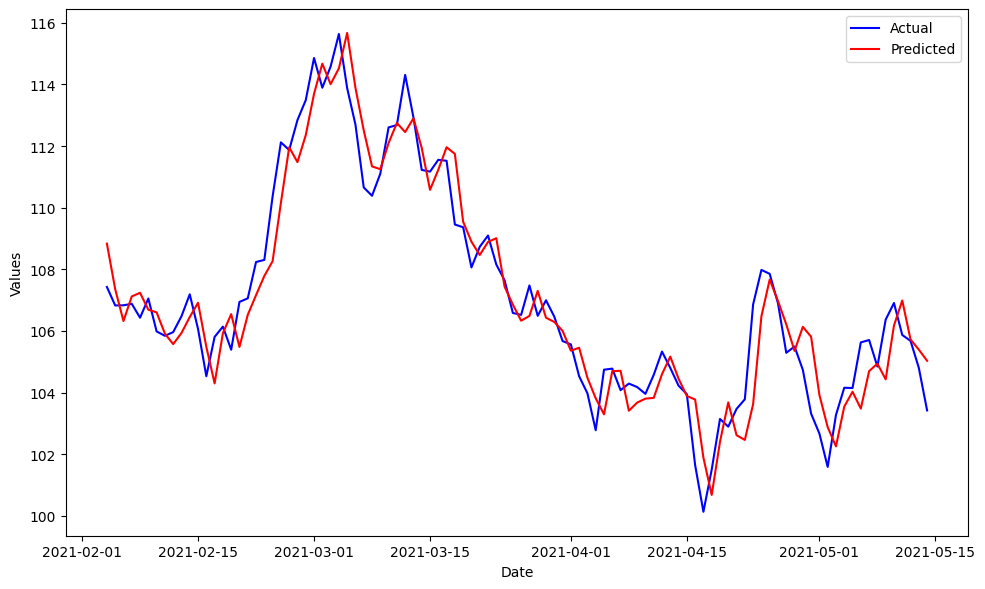

In [11]:
import matplotlib.pyplot as plt

# Plot actual vs predicted in a basic plot to inspect
plt.figure(figsize=(10, 6))
plt.plot(test["date"], y_test, label="Actual", color="Blue")
plt.plot(test["date"], y_pred, label="Predicted", color="Red")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.savefig("forecast_plot.png")
plt.show()